In [117]:
import pandas as pd
import numpy as np 
df = pd.read_csv("Hotel_Reviews.csv")
df.shape
print("Total number of observations:", df.shape[0], "Number of observed features:", df.shape[1])
df.columns

('Total number of observations:', 515738, 'Number of observed features:', 17)


Index([u'Hotel_Address', u'Additional_Number_of_Scoring', u'Review_Date',
       u'Average_Score', u'Hotel_Name', u'Reviewer_Nationality',
       u'Negative_Review', u'Review_Total_Negative_Word_Counts',
       u'Total_Number_of_Reviews', u'Positive_Review',
       u'Review_Total_Positive_Word_Counts',
       u'Total_Number_of_Reviews_Reviewer_Has_Given', u'Reviewer_Score',
       u'Tags', u'days_since_review', u'lat', u'lng'],
      dtype='object')

In [118]:
df.head()

Hotel_Address  \
0   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
1   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
2   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
3   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
4   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   

   Additional_Number_of_Scoring Review_Date  Average_Score   Hotel_Name  \
0                           194    8/3/2017            7.7  Hotel Arena   
1                           194    8/3/2017            7.7  Hotel Arena   
2                           194   7/31/2017            7.7  Hotel Arena   
3                           194   7/31/2017            7.7  Hotel Arena   
4                           194   7/24/2017            7.7  Hotel Arena   

  Reviewer_Nationality                                    Negative_Review  \
0              Russia    I am so angry that i made this post available...   
1             Ireland                                         No Negative   
2           Australia    Rooms are nice but for elderly a bit difficul...   
3      United Kingdom    My room was dirty and I was afraid to walk ba...   
4         New Zealand    You When I booked with your company on line y...   

   Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                397                     1403   
1                                  0                     1403   
2                                 42                     1403   
3                                210                     1403   
4                                140                     1403   

                                     Positive_Review  \
0   Only the park outside of the hotel was beauti...   
1   No real complaints the hotel was great great ...   
2   Location was good and staff were ok It is cut...   
3   Great location in nice surroundings the bar a...   
4    Amazing location and building Romantic setting    

   Review_Total_Positive_Word_Counts  \
0                                 11   
1                                105   
2                                 21   
3                                 26   
4                                  8   

   Total_Number_of_Reviews_Reviewer_Has_Given  Reviewer_Score  \
0                                           7             2.9   
1                                           7             7.5   
2                                           9             7.1   
3                                           1             3.8   
4                                           3             6.7   

                                                Tags days_since_review  \
0  [' Leisure trip ', ' Couple ', ' Duplex Double...            0 days   
1  [' Leisure trip ', ' Couple ', ' Duplex Double...            0 days   
2  [' Leisure trip ', ' Family with young childre...            3 days   
3  [' Leisure trip ', ' Solo traveler ', ' Duplex...            3 days   
4  [' Leisure trip ', ' Couple ', ' Suite ', ' St...           10 days   

         lat       lng  
0  52.360576  4.915968  
1  52.360576  4.915968  
2  52.360576  4.915968  
3  52.360576  4.915968  
4  52.360576  4.915968

#data cleaning

In [119]:
##remove duplicated data
sum(df.duplicated())
df = df.drop_duplicates()
df.shape
print("After removing duplicated data, the total number of observations is:", df.shape[0], 
      "the total number of features is:", df.shape[1])

('After removing duplicated data, the total number of observations is:', 515212, 'the total number of features is:', 17)


In [4]:
##check missing value
df.isnull().any().any()

True

In [5]:
nans = lambda df: df[df.isnull().any(axis = 1)]
nans_df = nans(df)[["Hotel_Name", "lat", "lng"]]
nans_df.shape

(3268, 3)

In [6]:
print("Total number of missing values:", nans_df.shape[0])

('Total number of missing values:', 3268)


In [7]:
nans_df.Hotel_Name.describe()

count                                    3268
unique                                     17
top       Fleming s Selection Hotel Wien City
freq                                      658
Name: Hotel_Name, dtype: object

In [8]:
nans_df.Hotel_Name.value_counts()

Fleming s Selection Hotel Wien City                 658
Hotel City Central                                  563
Hotel Atlanta                                       389
Maison Albar Hotel Paris Op ra Diamond              290
Hotel Daniel Vienna                                 245
Hotel Pension Baron am Schottentor                  223
Austria Trend Hotel Schloss Wilhelminenberg Wien    194
Derag Livinghotel Kaiser Franz Joseph Vienna        147
NH Collection Barcelona Podium                      146
City Hotel Deutschmeister                            93
Hotel Park Villa                                     61
Cordial Theaterhotel Wien                            57
Holiday Inn Paris Montmartre                         55
Roomz Vienna                                         49
Mercure Paris Gare Montparnasse                      37
Renaissance Barcelona Hotel                          33
Hotel Advance                                        28
Name: Hotel_Name, dtype: int64

In [9]:
###latitude information of Hotels
loc_lat = {'Fleming s Selection Hotel Wien City':48.209270,
       'Hotel City Central':48.2136,
       'Hotel Atlanta':48.210033,
       'Maison Albar Hotel Paris Op ra Diamond':48.875343,
       'Hotel Daniel Vienna':48.1888,
       'Hotel Pension Baron am Schottentor':48.216701,
       'Austria Trend Hotel Schloss Wilhelminenberg Wien':48.2195,
       'Derag Livinghotel Kaiser Franz Joseph Vienna':48.245998,
       'NH Collection Barcelona Podium':41.3916,
       'City Hotel Deutschmeister':48.22088,
       'Hotel Park Villa':48.233577,
       'Cordial Theaterhotel Wien':48.209488,
       'Holiday Inn Paris Montmartre':48.888920,
       'Roomz Vienna':48.186605,
       'Mercure Paris Gare Montparnasse':48.840012,
       'Renaissance Barcelona Hotel':41.392673,
       'Hotel Advance':41.383308}

In [10]:
###longitude information of Hotels
loc_lng ={'Fleming s Selection Hotel Wien City':16.353479,
       'Hotel City Central':16.3799,
       'Hotel Atlanta':16.363449,
       'Maison Albar Hotel Paris Op ra Diamond':2.323358,
       'Hotel Daniel Vienna':16.3840,
       'Hotel Pension Baron am Schottentor':16.359819,
       'Austria Trend Hotel Schloss Wilhelminenberg Wien':16.2856,
       'Derag Livinghotel Kaiser Franz Joseph Vienna':16.341080,
       'NH Collection Barcelona Podium':2.1779,
       'City Hotel Deutschmeister':16.36663,
       'Hotel Park Villa':16.345682,
       'Cordial Theaterhotel Wien':16.351585,
       'Holiday Inn Paris Montmartre':2.333087,
       'Roomz Vienna':16.420643,
       'Mercure Paris Gare Montparnasse':2.323595,
       'Renaissance Barcelona Hotel':2.167494,
       'Hotel Advance':2.162828}

In [11]:
df['lat'] = df['lat'].fillna(df['Hotel_Name'].apply(lambda x: loc_lat.get(x)))
df['lng'] = df['lng'].fillna(df['Hotel_Name'].apply(lambda x: loc_lng.get(x)))

In [12]:
##check missing value again after filling
df.isnull().any().any()

False

In [13]:
##save filling file
df.to_pickle('Filling_nans')

In [120]:
df = pd.read_pickle("Filling_nans")

In [15]:
df.head()

Hotel_Address  \
0   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
1   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
2   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
3   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
4   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   

   Additional_Number_of_Scoring Review_Date  Average_Score   Hotel_Name  \
0                           194    8/3/2017            7.7  Hotel Arena   
1                           194    8/3/2017            7.7  Hotel Arena   
2                           194   7/31/2017            7.7  Hotel Arena   
3                           194   7/31/2017            7.7  Hotel Arena   
4                           194   7/24/2017            7.7  Hotel Arena   

  Reviewer_Nationality                                    Negative_Review  \
0              Russia    I am so angry that i made this post available...   
1             Ireland                                         No Negative   
2           Australia    Rooms are nice but for elderly a bit difficul...   
3      United Kingdom    My room was dirty and I was afraid to walk ba...   
4         New Zealand    You When I booked with your company on line y...   

   Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                397                     1403   
1                                  0                     1403   
2                                 42                     1403   
3                                210                     1403   
4                                140                     1403   

                                     Positive_Review  \
0   Only the park outside of the hotel was beauti...   
1   No real complaints the hotel was great great ...   
2   Location was good and staff were ok It is cut...   
3   Great location in nice surroundings the bar a...   
4    Amazing location and building Romantic setting    

   Review_Total_Positive_Word_Counts  \
0                                 11   
1                                105   
2                                 21   
3                                 26   
4                                  8   

   Total_Number_of_Reviews_Reviewer_Has_Given  Reviewer_Score  \
0                                           7             2.9   
1                                           7             7.5   
2                                           9             7.1   
3                                           1             3.8   
4                                           3             6.7   

                                                Tags days_since_review  \
0  [' Leisure trip ', ' Couple ', ' Duplex Double...            0 days   
1  [' Leisure trip ', ' Couple ', ' Duplex Double...            0 days   
2  [' Leisure trip ', ' Family with young childre...            3 days   
3  [' Leisure trip ', ' Solo traveler ', ' Duplex...            3 days   
4  [' Leisure trip ', ' Couple ', ' Suite ', ' St...           10 days   

         lat       lng  
0  52.360576  4.915968  
1  52.360576  4.915968  
2  52.360576  4.915968  
3  52.360576  4.915968  
4  52.360576  4.915968

In [16]:
#basic preview of dataset
##feature: Hotel_Name
df.Hotel_Name.describe()

count                                         515212
unique                                          1492
top       Britannia International Hotel Canary Wharf
freq                                            4789
Name: Hotel_Name, dtype: object

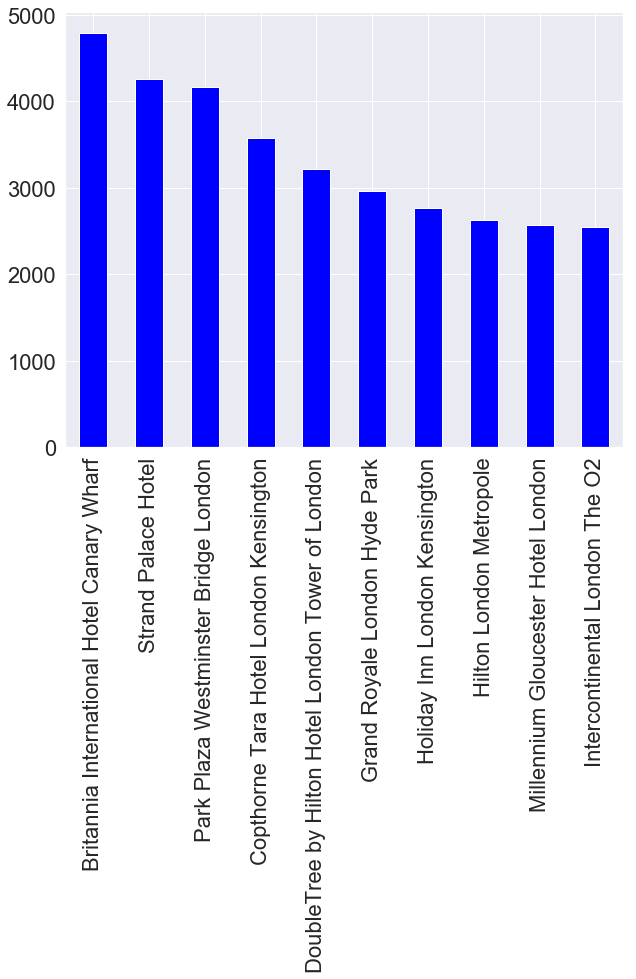

In [121]:
Hotel_Name_count = df.Hotel_Name.value_counts()
###plot top 10 reviewed hotel names
Hotel_Name_count[: 10].plot(kind = "bar", color = 'blue', figsize = (10, 8))

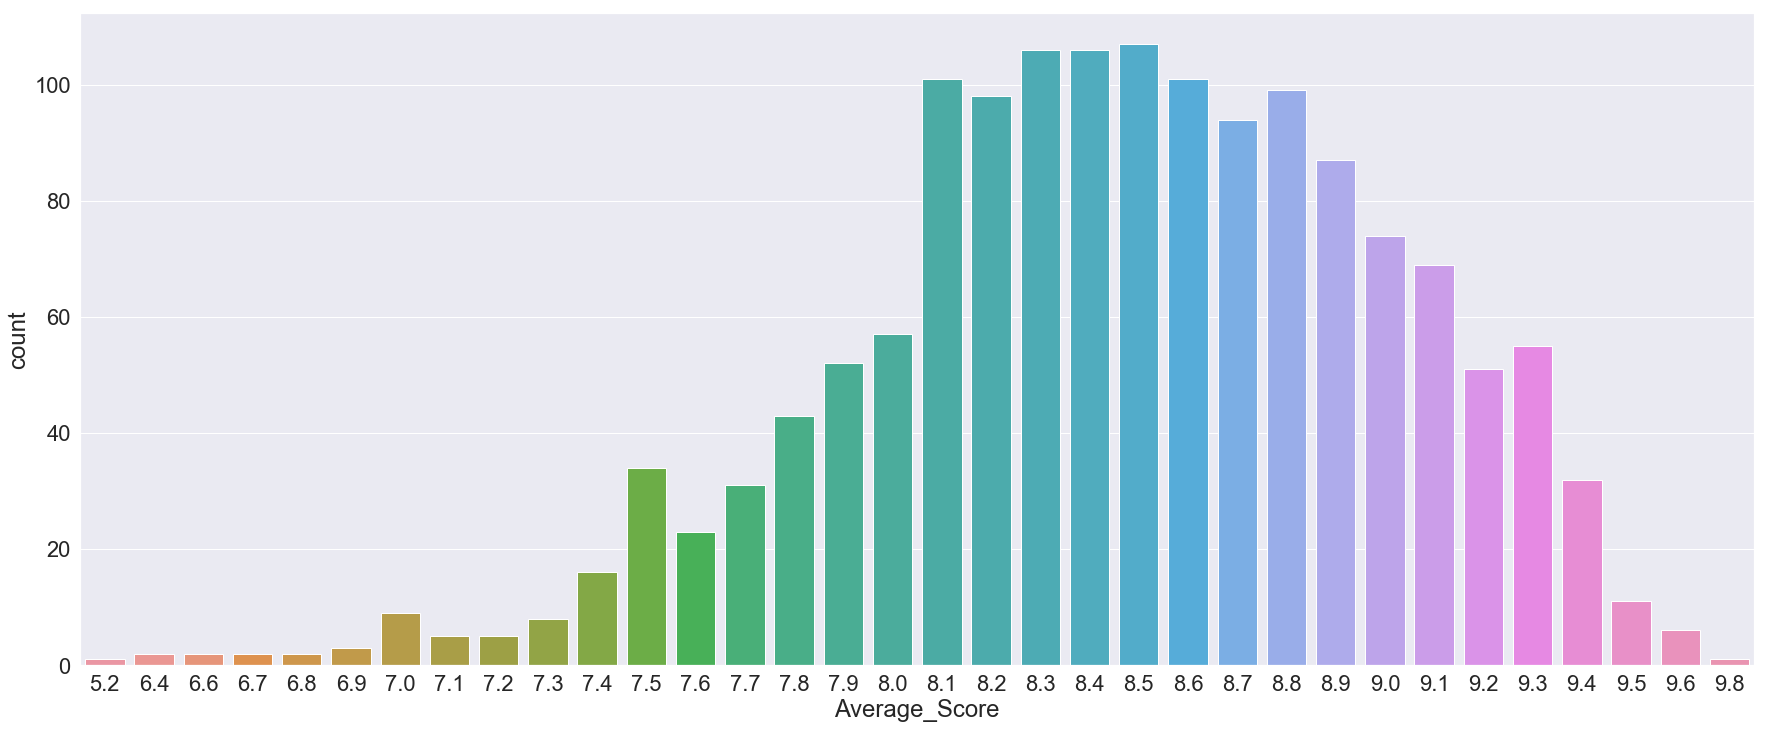

In [18]:
##feature: Average_Score
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib import pyplot
import seaborn
data_plot = df[['Hotel_Name', 'Average_Score']].drop_duplicates()
seaborn.set(font_scale = 2)
fig, ax = pyplot.subplots(figsize = (30, 12))
seaborn.countplot(ax = ax, x = "Average_Score", data = data_plot)

In [19]:
##feature: Review_Nationality
nationality = ""
for i in range(df.shape[0]):
    nationality = " ".join([nationality, df["Reviewer_Nationality"].values[i]])
nationality

'  Russia   Ireland   Australia   United Kingdom   New Zealand   Poland   United Kingdom   United Kingdom   Belgium   Norway   United Kingdom   France   United Kingdom   Italy   Canada   Italy   United Kingdom   Ireland   Netherlands   Australia   United Kingdom   France   Germany   Ireland   United Kingdom   United States of America   United Kingdom   France   United States of America   Hungary   Ireland   United Kingdom   United States of America   Netherlands   United States of America   Israel   Ireland   Russia   United Kingdom   Canada   Germany   United Kingdom   Switzerland   United Kingdom   United States of America   India   United Kingdom   United Kingdom   United Kingdom   United Arab Emirates   United Kingdom   United Kingdom   Netherlands   United Kingdom   Poland   United Kingdom   United Kingdom   United Kingdom   United Kingdom   Switzerland   Malaysia   Denmark   United Kingdom   South Africa   United Kingdom   United Kingdom   United Kingdom   South Africa   United A

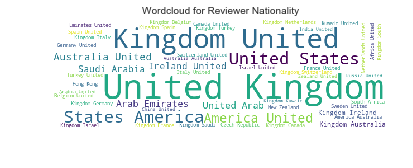

In [20]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color = "white", width = 600, height = 200, max_font_size = 60, 
                     max_words = 50).generate(nationality)
wordcloud.recolor(random_state = 300)
plt.imshow(wordcloud)
plt.title("Wordcloud for Reviewer Nationality", fontsize = 10)
plt.axis("off")
plt.show()

In [21]:
df.Reviewer_Nationality.describe()

count               515212
unique                 227
top        United Kingdom 
freq                245110
Name: Reviewer_Nationality, dtype: object

In [22]:
reviewer_nationality_count = df.Reviewer_Nationality.value_counts()
reviewer_nationality_count[:10] ###top 10 reviewer countries

 United Kingdom               245110
 United States of America      35349
 Australia                     21648
 Ireland                       14814
 United Arab Emirates          10229
 Saudi Arabia                   8940
 Netherlands                    8757
 Switzerland                    8669
 Germany                        7929
 Canada                         7883
Name: Reviewer_Nationality, dtype: int64

In [23]:
##feature of Review_date
df.Review_Date.describe()

count       515212
unique         731
top       8/2/2017
freq          2584
Name: Review_Date, dtype: object

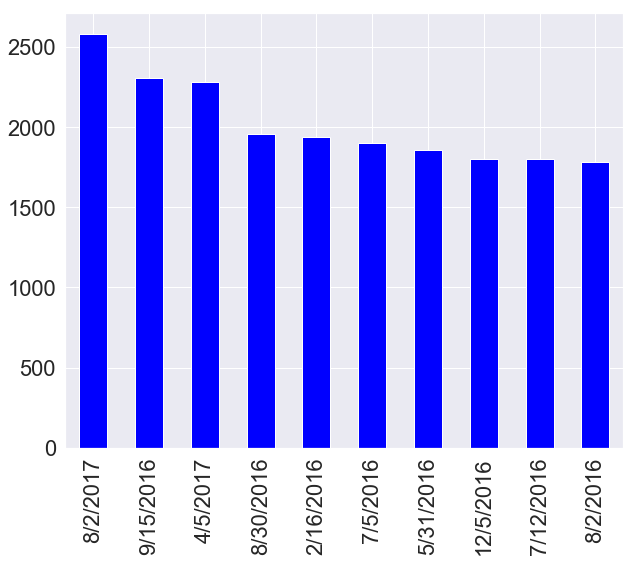

In [24]:
review_date_count = df.Review_Date.value_counts()
review_date_count[:10].plot(kind = 'bar', color = "blue", figsize = (10, 8))

In [25]:
##feature: Review_Total_Positive_Word_Counts
pos_words = df.Review_Total_Positive_Word_Counts.value_counts()
pos_words[:10]

0     35904
6     26887
5     26809
4     24624
7     24517
8     23219
3     22505
9     21188
2     20905
10    19597
Name: Review_Total_Positive_Word_Counts, dtype: int64

- **0** word means it's a 100% negative reviews. 

In [26]:
zero_word = df.loc[df.Review_Total_Positive_Word_Counts == 0]
print("Number of completely Negative reviews in the dataset is:", len(zero_word))
zero_word_list = zero_word[['Positive_Review', 'Negative_Review']]
zero_word_list.head()

('Number of completely Negative reviews in the dataset is:', 35904)


Positive_Review                                    Negative_Review
8       No Positive   Even though the pictures show very clean room...
32      No Positive   Our bathroom had an urine order Shower was ve...
98      No Positive   Got charged 50 for a birthday package when it...
121     No Positive   The first room had steep steps to a loft bed ...
134     No Positive   Foyer was a mess Only place to relax was the ...

In [27]:
##feature: Review_Total_Negative_Word_Counts
neg_words = df.Review_Total_Negative_Word_Counts.value_counts()
neg_words[:10]

0     127757
2      24631
3      18126
6      17726
5      16788
7      16123
4      15049
8      14709
9      13623
10     12409
Name: Review_Total_Negative_Word_Counts, dtype: int64

- **0** word means it's a 100% positive reviews. 

In [28]:
neg_zero_words = df.loc[df.Review_Total_Negative_Word_Counts == 0]
print('Number of completely positive reviews in the dataset is:', len(neg_zero_words))
neg_zero_word_list = neg_zero_words[['Positive_Review', 'Negative_Review']]
neg_zero_word_list.head()

('Number of completely positive reviews in the dataset is:', 127757)


Positive_Review Negative_Review
1    No real complaints the hotel was great great ...     No Negative
13   This hotel is being renovated with great care...     No Negative
15   This hotel is awesome I took it sincirely bec...     No Negative
18   Public areas are lovely and the room was nice...     No Negative
48   The quality of the hotel was brilliant and ev...     No Negative

#Calculate number of positive and negative reviews

In [29]:
df['pos_count'] = 0
df['neg_count'] = 0
##remove space and make each word lowercases
df['Negative_Review'] = [x.lower().strip() for x in df['Negative_Review']]
df['Positive_Review'] = [x.lower().strip() for x in df['Positive_Review']]
#df['Negative_Review'].head()

In [30]:
##if 'nothing' 'no positive' in Positive_Review, turn positive review to negative
df['neg_count'] = df.apply(lambda x: 1 if x['Positive_Review'] == 'no positive' or 
                            x['Positive_Review'] == 'nothing' or
                           x['Negative_Review'] == 'everything'
                           else x['pos_count'], axis = 1)

In [31]:
##if 'nothing' 'no negative' in Negative_Review, turn positive review to positive
df['pos_count'] = df.apply(lambda x: 1 if x['Negative_Review'] == 'no negative' or 
                           x['Negative_Review'] == 'nothing' or
                           x['Positive_Review'] == 'everything'
                           else x['neg_count'], axis = 1)

In [32]:
df.pos_count.value_counts()

0    327667
1    187545
Name: pos_count, dtype: int64

In [33]:
df.neg_count.value_counts()

0    477358
1     37854
Name: neg_count, dtype: int64

In [34]:
reviews = pd.DataFrame(df.groupby(['Hotel_Name'])['pos_count', 'neg_count'].sum())
reviews.head()

pos_count  neg_count
Hotel_Name                                              
11 Cadogan Gardens                         64         10
1K Hotel                                   38         12
25hours Hotel beim MuseumsQuartier        294         30
41                                         57          0
45 Park Lane Dorchester Collection         19          0

In [35]:
#reviews.reset_index().head()

In [36]:
reviews["Hotel_Name"] = reviews.index
reviews.index = range(reviews.shape[0])
reviews.head()

pos_count  neg_count                          Hotel_Name
0         64         10                  11 Cadogan Gardens
1         38         12                            1K Hotel
2        294         30  25hours Hotel beim MuseumsQuartier
3         57          0                                  41
4         19          0  45 Park Lane Dorchester Collection

In [37]:
reviews['total'] = reviews['pos_count'] + reviews['neg_count']
reviews['pos_ratio'] = reviews['pos_count'].astype('float') / reviews['total'].astype('float')
reviews.head()

pos_count  neg_count                          Hotel_Name  total  pos_ratio
0         64         10                  11 Cadogan Gardens     74   0.864865
1         38         12                            1K Hotel     50   0.760000
2        294         30  25hours Hotel beim MuseumsQuartier    324   0.907407
3         57          0                                  41     57   1.000000
4         19          0  45 Park Lane Dorchester Collection     19   1.000000

In [38]:
reviews.to_pickle("./data/reviews")

In [39]:
###stemming, removing stop words
pos_reviews = df['Positive_Review'].values
pos_reviews = pos_reviews.tolist()
neg_reviews = df['Negative_Review'].values
neg_reviews = neg_reviews.tolist()
#pos_reviews
#neg_reviews
total_text = pos_reviews + neg_reviews
#total_text

In [40]:
#pos_reviews

In [41]:
score = ['positive' for i in range(len(pos_reviews))]
score += ['negative' for i in range(len(neg_reviews))]
for i in range(len(score)):
    if score[i] == 'positive':
        score[i] = 1
    else:
        score[i] = 0

In [42]:
text_df = pd.DataFrame()
text_df['reviews'] = total_text
text_df['score'] = score
text_df.head()

reviews  score
0   only the park outside of the hotel was beautiful      1
1  no real complaints the hotel was great great l...      1
2  location was good and staff were ok it is cute...      1
3  great location in nice surroundings the bar an...      1
4     amazing location and building romantic setting      1

In [43]:
###nltk
##removing stop words
import re
import time
import nltk
from collections import Counter
from nltk import word_tokenize
from nltk.corpus import stopwords ###not work well
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
start_time = time.time()
text = text_df['reviews'].values
print("Start removing stop words")
stop = set(stopwords.words('english'))  ##not work well
stop_words = [word.strip("\n") for word in open('stopwords.txt').readlines()]
#len(stop)
words = []
summary = []
all_pos_words = []
all_neg_words = []
for i in range(0,len(text)):
    if type(text[i]) == type('') :
        sentence = text[i]
        sentence = re.sub("[^a-zA-Z]"," ", sentence)
        buffer_sentence = [k for k in sentence.split() if k not in stop]
        buffer_sentence_n = [k for k in sentence.split() if k not in stop_words]
        word = ''
        for j in buffer_sentence:
            if len(j) >= 2:
                if i <= (len(text)/2): 
                    all_pos_words.append(j)
                else:
                    all_neg_words.append(j)
                word +=' '+j
        summary.append(word)    
print("performing stemming")
porter = PorterStemmer()
for i in range(0,len(summary)):
    summary[i] = porter.stem(summary[i])
print("--- %s seconds ---" % (time.time() - start_time))

Start removing stop words
performing stemming
--- 169.019735098 seconds ---


In [44]:
len(all_pos_words), len(all_neg_words)

(4942031, 4580510)

In [45]:
###count frequenct
freq_pos = Counter(all_pos_words)
freq_neg = Counter(all_neg_words)
print("Most common positive words: ", freq_pos.most_common(20))
print("Most common negative words: ", freq_neg.most_common(20))

('Most common positive words: ', [('staff', 194387), ('location', 192645), ('room', 140651), ('hotel', 125218), ('good', 112201), ('great', 105531), ('friendly', 85273), ('breakfast', 84524), ('helpful', 76102), ('nice', 69379), ('clean', 66859), ('excellent', 62229), ('comfortable', 59903), ('bed', 49881), ('rooms', 40325), ('positive', 36445), ('lovely', 35073), ('stay', 32008), ('close', 30936), ('station', 29262)])
('Most common negative words: ', [('room', 175835), ('negative', 129312), ('hotel', 74625), ('breakfast', 58410), ('small', 49837), ('staff', 39467), ('nothing', 38737), ('rooms', 34776), ('would', 32264), ('could', 32046), ('bed', 29819), ('one', 28054), ('bit', 27521), ('bathroom', 26568), ('night', 24071), ('little', 22520), ('like', 22433), ('shower', 21283), ('good', 20789), ('us', 20216)])


Top 5 aspects in positive reviews are: "staff", "location", "room", "breakfast", "bed". 
Top 5 aspects in negative reviews are: "room", "breakfast", "staff", "bed", "bathroom".

In [46]:
len(freq_pos), len(freq_neg)

(48933, 51879)

In [47]:
stop_words = [word.strip("\n") for word in open('stopwords.txt').readlines()]
start_time = time.time()
words_n = []
summary_n = []
all_pos_words_n = []
all_neg_words_n = []
for i in range(0,len(text)):
    if type(text[i]) == type('') :
        sentence_n = text[i]
        sentence_n = re.sub("[^a-zA-Z]"," ", sentence_n)
        #buffer_sentence = [k for k in sentence.split() if k not in stop]
        buffer_sentence_n = [k for k in sentence_n.split() if k not in stop_words]
        word_n = ''
        for j in buffer_sentence_n:
            if len(j) >= 2:
                if i <= (len(text)/2): 
                    all_pos_words_n.append(j)
                else:
                    all_neg_words_n.append(j)
                word_n +=' '+j
        summary_n.append(word_n)    
print("performing stemming")
porter = PorterStemmer()
for i in range(0,len(summary)):
    summary[i] = porter.stem(summary[i])
print("--- %s seconds ---" % (time.time() - start_time))

performing stemming
--- 128.126522064 seconds ---


In [48]:
freq_pos_n = Counter(all_pos_words_n)
freq_neg_n = Counter(all_neg_words_n)
len(freq_pos_n), len(freq_neg_n)

(48716, 51653)

In [49]:
print("Most common new positive words: ", freq_pos_n.most_common(20))
print("Most common new negative words: ", freq_neg_n.most_common(20))

('Most common new positive words: ', [('staff', 194387), ('location', 192645), ('room', 140651), ('hotel', 125218), ('good', 112201), ('great', 105531), ('friendly', 85273), ('breakfast', 84524), ('helpful', 76102), ('nice', 69379), ('clean', 66859), ('excellent', 62229), ('comfortable', 59903), ('bed', 49881), ('rooms', 40325), ('positive', 36445), ('lovely', 35073), ('stay', 32008), ('close', 30936), ('station', 29262)])
('Most common new negative words: ', [('room', 175835), ('negative', 129312), ('hotel', 74625), ('breakfast', 58410), ('small', 49837), ('staff', 39467), ('rooms', 34776), ('bed', 29819), ('bit', 27521), ('bathroom', 26568), ('didn', 26441), ('night', 24071), ('shower', 21283), ('good', 20789), ('did', 20086), ('service', 19305), ('bar', 19115), ('time', 17458), ('stay', 17410), ('reception', 16625)])


Top 5 aspects in new positive reviews are: "staff", "location", "room", "hotel", "breakfast". 
Top 5 aspects in new negative reviews are: "room", "breakfast", "staff", "rooms", "bed".
No differece with previous. So continue with previous way of removing stop words. 

In [50]:
with open('./data/freq_pos.txt', 'w') as fp:
    fp.write("\n".join('%s %f' % x for x in freq_pos.most_common()))
with open('./data/freq_pos_20.txt', 'w') as fp:
    fp.write("\n".join('%s %f' % x for x in freq_pos.most_common(20)))
with open('./data/freq_neg.txt', 'w') as fp:
    fp.write("\n".join('%s %f' % x for x in freq_neg.most_common()))
with open('./data/freq_neg_20.txt', 'w') as fp:
    fp.write("\n".join('%s %f' % x for x in freq_neg.most_common(20)))

In [51]:
with open('./data/freq_pos_text.txt', 'w') as fp:
    fp.write('\n'.join(x[0] for x in freq_pos.most_common()))
with open('./data/freq_neg_text.txt', 'w') as fp:
    fp.write('\n'.join(x[0] for x in freq_neg.most_common()))

In [52]:
with open('./data/freq_pos_text.txt') as f:
    pos_words_list = f.read().splitlines()
pos_words_list
pos_words = ''
for i in range(len(pos_words_list)):
    pos_words = " ".join([pos_words, pos_words_list[i]])

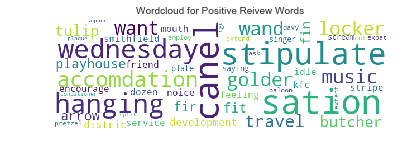

In [53]:
wordcloud_pos = WordCloud(background_color = "white", width = 600, height = 200, max_font_size = 60, 
                     max_words = 50).generate(pos_words)
wordcloud.recolor(random_state = 300)
plt.imshow(wordcloud_pos)
plt.title("Wordcloud for Positive Reivew Words", fontsize = 10)
plt.axis("off")
plt.show()

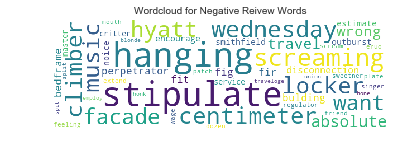

In [54]:
with open('./data/freq_neg_text.txt') as f:
    neg_words_list = f.read().splitlines()
neg_words = ''
for i in range(len(neg_words_list)):
    neg_words = " ".join([neg_words, neg_words_list[i]])
wordcloud_neg = WordCloud(background_color = "white", width = 600, height = 200, max_font_size = 60, 
                     max_words = 50).generate(neg_words)
wordcloud.recolor(random_state = 300)
plt.imshow(wordcloud_neg)
plt.title("Wordcloud for Negative Reivew Words", fontsize = 10)
plt.axis("off")
plt.show()

In [55]:
score = text_df['score'].values
text_df['Summary'] = summary
text_df['score'] = score
text_df.to_pickle('text_df') ##data after preprocessing
#text_df.head()

In [56]:
###sentiment analysis
##load data 
data = pd.read_pickle('Filling_nans')
df = pd.read_pickle('text_df')
##load positvie reviews and negative reviews
pos_reviews = data['Positive_Review'].values
pos_reviews = pos_reviews.tolist()
neg_reviews = data['Negative_Review'].values
neg_reviews = neg_reviews.tolist()
reviews_text = pos_reviews + neg_reviews
summary = np.array(df.Summary)
score = df['score'].values

**1. Naive Bayes**

In [57]:
from sklearn.feature_extraction.text import CountVectorizer ##tokenizing
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [58]:
start_time = time.time()
optimal_para = [] ###store optimal paraments for multinomialNB
parameters = {'alpha': [i for i in range(1, 100, 10)]}
accuracy = []
score = list(score)
for i in range(2000, 14000, 1000):
    vec = CountVectorizer(max_features = i)
    data = vec.fit_transform(summary)
    nb = MultinomialNB()
    clf = GridSearchCV(nb, parameters, cv = 5)
    x_train, x_test, y_train, y_test = train_test_split(data, score, test_size = 0.3, random_state = 42)
    clf.fit(x_train, y_train)
    accuracy.append(100.0 * sum(clf.predict(x_test)) / len(clf.predict(x_test)))
    optimal_para.append(clf.best_params_)
    vec = 0
    data = 0
print('find optimal parameters: %s seconds' %(time.time() - start_time))

find optimal parameters: 809.53184104 seconds


In [59]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(x_test)
conf_NB = confusion_matrix(y_test, y_pred)
conf_NB

array([[140946,  13747],
       [  9488, 144947]])

In [60]:
###normalized confusion matrix
nor_conf_NB = conf_NB / conf_NB.astype(np.float).sum(axis = 1)
nor_conf_NB

array([[0.91113366, 0.0890148 ],
       [0.06133438, 0.93856315]])

In [61]:
#from sklearn.metrics import classification_report
#print(classification_report(y_test, y_pred))

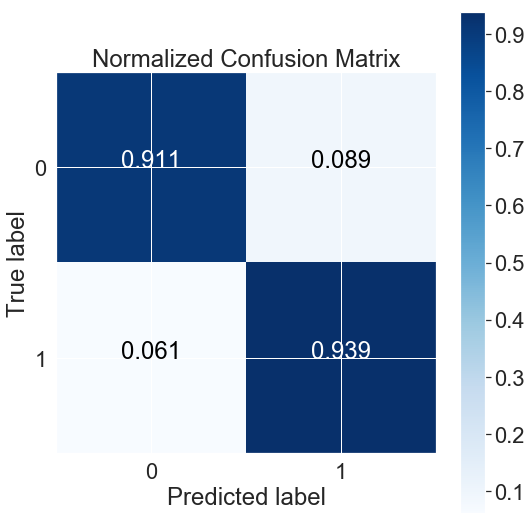

In [62]:
import itertools
def plot_confusion_matrix(cm, classes_label = ['0', '1']):
    #tn = cm[0, 0]
    #fp = cm[0, 1]
    #fn = cm[1, 0]
    #tp = cm[1, 1]
    #num_pos = fn + tp
    #num_neg = tn + fp
    #total_num = num_pos + num_neg
    plt.figure(figsize = (8, 8))
    plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Blues)
    plt.title('Normalized Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes_label))
    plt.xticks(tick_marks, classes_label)
    plt.yticks(tick_marks, classes_label)
    fmt = '.3f'
    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), 
                horizontalalignment = 'center', 
                color = 'white' if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
plot_confusion_matrix(nor_conf_NB)

In [63]:
tn = conf_NB[0, 0]
fp = conf_NB[0, 1]
fn = conf_NB[1, 0]
tp = conf_NB[1, 1]
precision = 100 * float(tp) / (tp + fp)
recall = 100 * float(tp) / (tp + fn)
accuracy = 100 * float(tp + tn) / len(y_test)
#accuracy
#precision
#recall

In [64]:
print("Accuracy for Naive Bayes is {}%".format(round(accuracy, 2)))
print("Precision for Naive Bayes is {}%".format(round(precision, 2)))
print("Recall for Naive Bayes is {}%".format(round(recall, 2)))

Accuracy for Naive Bayes is 92.48%
Precision for Naive Bayes is 91.34%
Recall for Naive Bayes is 93.86%


**2. Logistic Regression**

In [65]:
from sklearn.linear_model import SGDClassifier
optimal_params_log_reg = []
parameters = {'loss' :['log'],'penalty':['l1','l2','elasticnet'],'alpha':[float(i)/10 for i in range(1,10,1)],
              'n_jobs':[-1]}
clf = SGDClassifier()
clf = GridSearchCV(clf, parameters, cv = 5)
clf.fit(x_train, y_train)
optimal_params_log_reg.append(clf.best_params_)
print("Best parameters for Logistic Regression are:", optimal_params_log_reg)

/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


('Best parameters for Logistic Regression are:', [{'penalty': 'l2', 'alpha': 0.1, 'n_jobs': -1, 'loss': 'log'}])


In [66]:
clf = SGDClassifier(loss = 'log', penalty = 'l2', alpha = 0.1, n_jobs = -1)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
conf_log_reg = confusion_matrix(y_test, y_pred)
conf_log_reg

array([[134987,  19706],
       [ 20001, 134434]])

In [67]:
###normalized confusion matrix
nor_conf_log_reg = conf_log_reg / conf_log_reg.astype(np.float).sum(axis = 1)
nor_conf_log_reg

array([[0.87261221, 0.12760061],
       [0.1292948 , 0.8704892 ]])

In [68]:
#from sklearn.metrics import classification_report
#print(classification_report(y_test, y_pred))

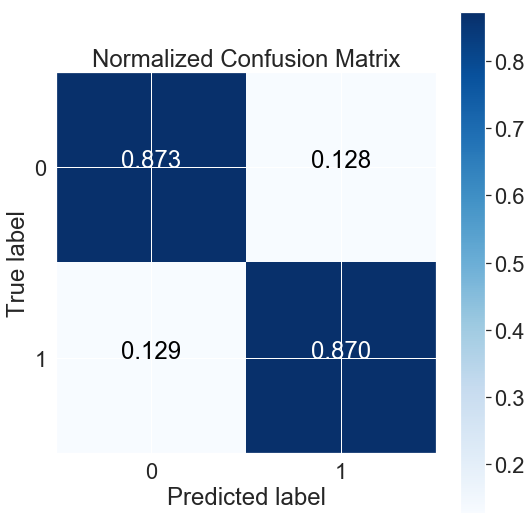

In [69]:
plot_confusion_matrix(nor_conf_log_reg)

In [70]:
tn_2 = conf_log_reg[0, 0]
fp_2 = conf_log_reg[0, 1]
fn_2 = conf_log_reg[1, 0]
tp_2 = conf_log_reg[1, 1]
precision_2 = 100 * float(tp_2) / (tp_2 + fp_2)
recall_2 = 100 * float(tp_2) / (tp_2 + fn_2)
accuracy_2 = 100 * float(tp_2 + tn_2) / len(y_test)
#accuracy_2
#precision_2
#recall_2
print("Accuracy for Logistic Regression is {}%".format(round(accuracy_2, 2)))
print("Precision for Logistic Regression is {}%".format(round(precision_2, 2)))
print("Recall for Logistic Regression is {}%".format(round(recall_2, 2)))

Accuracy for Logistic Regression is 87.16%
Precision for Logistic Regression is 87.22%
Recall for Logistic Regression is 87.05%


**3. Support Vector Machine(SVM)**

In [71]:
optimal_param_SVM = []
parameters = {'loss' :['hinge'],'penalty':['l1','l2','elasticnet'],'alpha':[float(i)/10 for i in range(1,10,1)],
              'n_jobs':[-1]}
clf = SGDClassifier()
clf = GridSearchCV(clf, parameters, cv = 5)
clf.fit(x_train, y_train)
optimal_param_SVM = clf.best_params_
print('Best parameters for Linear SVM are: ', optimal_param_SVM)

('Best parameters for Linear SVM are: ', {'penalty': 'l2', 'alpha': 0.1, 'n_jobs': -1, 'loss': 'hinge'})


In [72]:
clf = SGDClassifier(penalty = 'l2', alpha = 0.1, n_jobs = -1, loss = 'hinge')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
conf_SVM = confusion_matrix(y_test, y_pred)
print(conf_SVM)

[[140113  14580]
 [ 24038 130397]]


In [73]:
###normalized confusion matrix
nor_conf_SVM = conf_SVM / conf_SVM.astype(np.float).sum(axis = 1)
nor_conf_SVM

array([[0.90574881, 0.09440865],
       [0.15539165, 0.84434876]])

In [74]:
#from sklearn.metrics import classification_report
#print(classification_report(y_test, y_pred))

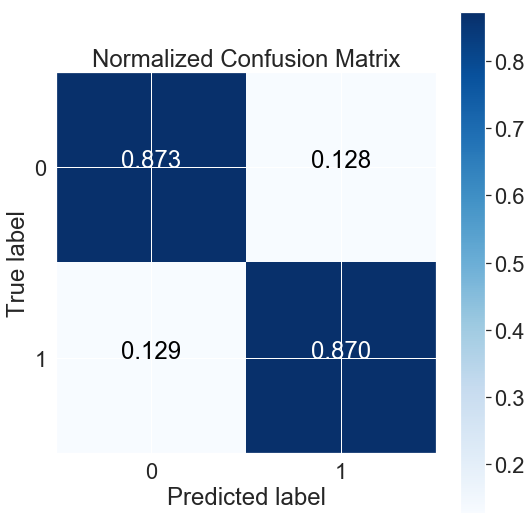

In [75]:
plot_confusion_matrix(nor_conf_log_reg)

In [76]:
tn_3 = conf_SVM[0, 0]
fp_3 = conf_SVM[0, 1]
fn_3 = conf_SVM[1, 0]
tp_3 = conf_SVM[1, 1]
precision_3 = 100 * float(tp_3) / (tp_3 + fp_3)
recall_3 = 100 * float(tp_3) / (tp_3 + fn_3)
accuracy_3 = 100 * float(tp_3 + tn_3) / len(y_test)
#accuracy_3
#precision_3
#recall_3
print("Accuracy for SVM is {}%".format(round(accuracy_3, 2)))
print("Precision for SVM is {}%".format(round(precision_3, 2)))
print("Recall for SVM is {}%".format(round(recall_3, 2)))

Accuracy for SVM is 87.51%
Precision for SVM is 89.94%
Recall for SVM is 84.43%


**4. Decision Tree**

In [77]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
conf_dec_tree = confusion_matrix(y_test, y_pred)
print(conf_dec_tree)  ###take longest time

[[138705  15988]
 [ 14725 139710]]


In [78]:
###normalized confusion matrix
nor_conf_dec_tree= conf_dec_tree / conf_dec_tree.astype(np.float).sum(axis = 1)
nor_conf_dec_tree

array([[0.89664691, 0.10352576],
       [0.09518853, 0.90465244]])

In [79]:
#from sklearn.metrics import classification_report
#print(classification_report(y_test, y_pred))

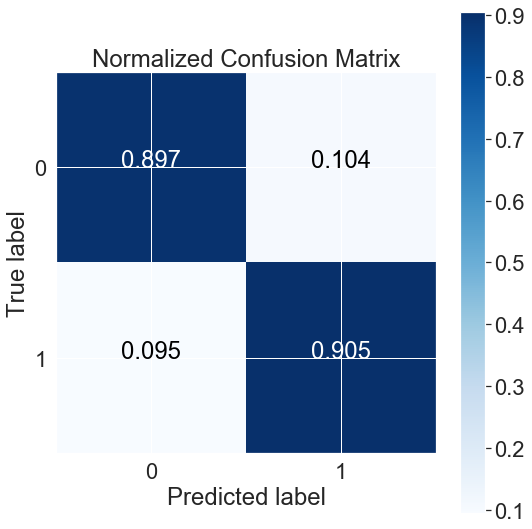

In [80]:
plot_confusion_matrix(nor_conf_dec_tree)

In [81]:
tn_4 = conf_dec_tree[0, 0]
fp_4 = conf_dec_tree[0, 1]
fn_4 = conf_dec_tree[1, 0]
tp_4 = conf_dec_tree[1, 1]
precision_4 = 100 * float(tp_4) / (tp_4 + fp_4)
recall_4 = 100 * float(tp_4) / (tp_4 + fn_4)
accuracy_4 = 100 * float(tp_4 + tn_4) / len(y_test)
#accuracy_4
#precision_4
#recall_4
print("Accuracy for Decision Tree is {}%".format(round(accuracy_4, 2)))
print("Precision for Decision Tree is {}%".format(round(precision_4, 2)))
print("Recall for Decision Tree is {}%".format(round(recall_4, 2)))

Accuracy for Decision Tree is 90.06%
Precision for Decision Tree is 89.73%
Recall for Decision Tree is 90.47%


Since **Naive Bayes** has the highest accuracy score, try to improve Naive Bayes by applying Bi-grams or n-grams. 

**5. Bi-grams Naive Bayes**

In [82]:
start_time = time.time()
optimal_para = [] ###store optimal paraments for multinomialNB
parameters = {'alpha': [i for i in range(1, 100, 10)]}
accuracy = []
score = list(score)
for i in range(2000, 14000, 1000):
    vec = CountVectorizer(ngram_range = (1, 2), max_features = i)
    data = vec.fit_transform(summary)
    nb = MultinomialNB()
    clf = GridSearchCV(nb, parameters, cv = 5)
    x_train, x_test, y_train, y_test = train_test_split(data, score, test_size = 0.3, random_state = 42)
    clf.fit(x_train, y_train)
    accuracy.append(100.0 * sum(clf.predict(x_test)) / len(clf.predict(x_test)))
    optimal_para.append(clf.best_params_)
    vec = 0
    data = 0
print('find optimal parameters: %s seconds' %(time.time() - start_time))
y_pred = clf.predict(x_test)
conf_NB_Bi = confusion_matrix(y_test, y_pred)
conf_NB_Bi

find optimal parameters: 1225.90935683 seconds


array([[143232,  11461],
       [ 10438, 143997]])

In [83]:
###normalized confusion matrix
nor_conf_NB_Bi= conf_NB_Bi / conf_NB_Bi.astype(np.float).sum(axis = 1)
nor_conf_NB_Bi

array([[0.92591132, 0.07421245],
       [0.06747558, 0.93241169]])

In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93    154693
           1       0.93      0.93      0.93    154435

   micro avg       0.93      0.93      0.93    309128
   macro avg       0.93      0.93      0.93    309128
weighted avg       0.93      0.93      0.93    309128



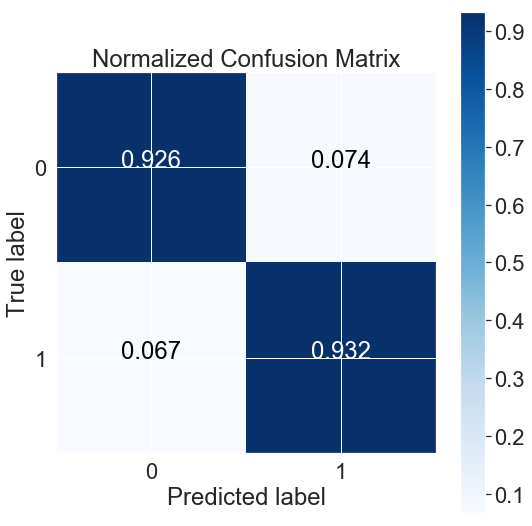

In [85]:
plot_confusion_matrix(nor_conf_NB_Bi)

In [86]:
tn_5 = conf_NB_Bi[0, 0]
fp_5 = conf_NB_Bi[0, 1]
fn_5 = conf_NB_Bi[1, 0]
tp_5 = conf_NB_Bi[1, 1]
precision_5 = 100 * float(tp_5) / (tp_5 + fp_5)
recall_5 = 100 * float(tp_5) / (tp_5 + fn_5)
accuracy_5 = 100 * float(tp_5 + tn_5) / len(y_test)
#accuracy_5
#precision_5
#recall_5
print("Accuracy for Bi-gram Naive Bayes is {}%".format(round(accuracy_5, 2)))
print("Precision for Bi-gram Naive Bayes is {}%".format(round(precision_5, 2)))
print("Recall for Bi-gram Naive Bayes is {}%".format(round(recall_5, 2)))

Accuracy for Bi-gram Naive Bayes is 92.92%
Precision for Bi-gram Naive Bayes is 92.63%
Recall for Bi-gram Naive Bayes is 93.24%


**Conclusion**: Naive Bayes has the highest accuracy score for binary classification of review

**Review Predict function**
##Predict function of a given review return a value standing for how positive and how negative. In order to get respective sentiment score for each word in both positive and negtative words, use **nltk** library.
return a value? Using Naives Bayes
neg_sentiment_score() return a value stands for negative preview of a given text. 
pos_sentiment_score() return a value stands for positive preview of a given text.

In [87]:
from nltk.classify.scikitlearn import SklearnClassifier
from nltk.classify import NaiveBayesClassifier
from nltk.metrics import precision, recall, f_measure
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import ToktokTokenizer

In [88]:
toktok = ToktokTokenizer()
stop_words_nltk = set(stopwords.words('english'))
def word_process(text):
    clean_words = re.sub("[^a-zA-Z]"," ", text)
    clean_words = clean_words.lower()
    words = word_tokenize(clean_words)
    words = [toktok.tokenize(k) for k in sent_tokenize(clean_words)]
    result = []
    if not words:
        pass
    else:
        for w in words[0]:
            if w not in stop_words_nltk:
                result.append(w)
    return result

In [89]:
###word_porcess function test
#x = ('My room was dirty and I was afraid to walk barefoot on the floor which looked as if it was not cleaned in weeks White furniture which looked nice in pictures was dirty too and the door looked like it was attacked by an angry dog My shower drain was clogged and the staff did not respond to my request to clean it On a day with heavy rainfall a pretty common occurrence in Amsterdam the roof in my room was leaking luckily not on the bed you could also see signs of earlier water damage I also saw insects running on the floor Overall the second floor of the property looked dirty and badly kept On top of all of this a repairman who came to fix something in a room next door at midnight was very noisy as were many of the guests I understand the challenges of running a hotel in an old building but this negligence is inconsistent with prices demanded by the hotel On the last night after I complained about water damage the night shift manager offered to move me to a different room but that offer came pretty late around midnight when I was already in bed and ready to sleep')
#word_process(x)
##word_process function works as expected

**Naive Bayes** 

In [90]:
pos = pd.DataFrame({'col': pos_reviews})
neg = pd.DataFrame({'col': neg_reviews})
pos.head()
neg.head()
#len(pos), len(neg)

col
0   I am so angry that i made this post available...
1                                        No Negative
2   Rooms are nice but for elderly a bit difficul...
3   My room was dirty and I was afraid to walk ba...
4   You When I booked with your company on line y...

In [91]:
def word_feats(words):
    return dict([(word, True) for word in words])
start_time = time.time()
neg_set=[(word_feats(word_feats(word_process(neg.loc[i, 'col']))), 0) for i in range(len(neg))]
pos_set=[(word_feats(word_feats(word_process(pos.loc[i, 'col']))), 1) for i in range(len(pos))]
print('Processing time: %s seconds' %(time.time() - start_time))

Processing time: 347.318456888 seconds


In [92]:
pos_cutoff = int(len(pos_set) * 0.7)
neg_cutoff = int(len(neg_set) * 0.7)
train_words = pos_set[: pos_cutoff] + neg_set[: neg_cutoff]
test_words = pos_set[pos_cutoff:] + neg_set[neg_cutoff:]
len(train_words), len(test_words)

(721296, 309128)

In [93]:
classifier_NB = NaiveBayesClassifier.train(train_words)
accuracy_NB = nltk.classify.accuracy(classifier_NB, test_words)
accuracy_NB

0.9198778499521234

In [94]:
print("Accuracy for Review Sentiment Analysis by Naive Bayes is {}%".format(round(100 * accuracy_NB, 2)))

Accuracy for Review Sentiment Analysis by Naive Bayes is 91.99%


In [95]:
probdist = classifier_NB._feature_probdist
word_list = []
word_score = []
sentiment = []
for (name, value) in classifier_NB.most_informative_features(10000):
    def label_prob(l):
        return probdist[l,name].prob(value)
    labels = sorted([l for l in classifier_NB._labels if value in probdist[l, name].samples()],
                   key = label_prob)
    if len(labels) == 1:
        continue
    l0 = labels[0]
    l1 = labels[-1]
    if probdist[l0, name].prob(value) == 0:
        ration = "INF"
    else:
        ration = '%8.1f' % (probdist[l1, name].prob(value) / probdist[l0, name].prob(value))
    sentiment.append(int(l1))
    word_list.append(name)
    word_score.append(float(ration))
#len(word_list)

In [96]:
print(word_score[:20])

[577.7, 155.6, 81.0, 77.0, 75.7, 75.0, 74.1, 73.7, 73.0, 71.8, 67.2, 63.7, 63.0, 62.9, 59.0, 58.2, 57.5, 57.4, 55.7, 55.0]


In [97]:
word_sentiment_score = pd.DataFrame({'word': word_list, 'sentiment': sentiment, 'score': word_score})
word_sentiment_score.head()
neg_word_sen_score = word_sentiment_score[word_sentiment_score.sentiment == 0]
#display(word_sentiment_score[word_sentiment_score['sentiment'] == 1])
neg_word_sen_score.head()
neg_word_sen_score.shape

(6441, 3)

In [98]:
pos_word_sen_score = word_sentiment_score[word_sentiment_score.sentiment == 1]
pos_word_sen_score.head()
pos_word_sen_score.shape

(3559, 3)

In [105]:
neg_word_sen_score.to_csv('./data/neg_word_sen_score.csv', index=False)
pos_word_sen_score.to_csv('./data/pos_word_sen_score.csv', index=False)

**Predict function**

In [99]:
set_of_pos_word = set(pos_word_sen_score.word) - set(['no', 'negative', 'positive'])
set_of_neg_word = set(neg_word_sen_score.word) - set(['no', 'negative', 'positive'])
def pos_sentiment_score(review):
    pos = 0
    clean = word_process(review)
    for w in clean:
        if w in set_of_pos_word:
            pos += pos_word_sen_score[pos_word_sen_score['word'] == w].score.iloc[0]
    return pos
def neg_sentiment_score(review):
    neg = 0
    clean = word_process(review)
    for w in clean:
        if w in set_of_neg_word:
            neg += neg_word_sen_score[neg_word_sen_score['word'] == w].score.iloc[0]
    return neg
#print(pos_sentiment_score(total_text[2]))

In [100]:
#print(neg_sentiment_score(total_text[1]))

In [101]:
#total_text[1]

In [102]:
##test
#total_text[0]

In [103]:
###test--works well
#(len(total_text), len(pos_reviews), len(neg_reviews))
#print(pos_sentiment_score(pos_reviews[1]), neg_sentiment_score(total_text[1]))

##Predict average score for hotel## 
based on two values from pos_sentiment_score() and neg_sentiment_score()

In [106]:
pos_score = []
start_time = time.time()
for i in range(len(pos_reviews)):
    pos_score.append(pos_sentiment_score(pos_reviews[i]))
print('pos_score %s seconds' % (time.time() - start_time))
pos_score[:5]

pos_score 3108.43393493 seconds


[23.1, 135.7, 57.300000000000004, 63.599999999999994, 43.6]

In [107]:
###save to file
np.savetxt('./data/pos_score.txt', pos_score, delimiter=',')

In [108]:
neg_score = []
start_time = time.time()
for i in range(len(neg_reviews)):
    neg_score.append(neg_sentiment_score(neg_reviews[i]))
print('neg_score %s seconds' % (time.time() - start_time))
neg_score[:5]
###save to file
np.savetxt('./data/neg_score.txt', neg_score, delimiter=',') 

neg_score 3423.66275191 seconds


In [109]:
data = pd.read_pickle('Filling_nans')
##print(len(data), len(pos_reviews), len(neg_reviews))  (515212, 515212, 515212)
new_dataset = pd.DataFrame({'Hotel_name': data['Hotel_Name'], 'Avg_score': data['Average_Score'], 'pos': pos_score, 
                            'neg':  neg_score})
new_dataset.head()

Avg_score   Hotel_name    neg    pos
0        7.7  Hotel Arena  465.1   23.1
1        7.7  Hotel Arena    0.0  135.7
2        7.7  Hotel Arena   63.2   57.3
3        7.7  Hotel Arena  466.0   63.6
4        7.7  Hotel Arena  141.8   43.6

In [110]:
hotel_name = set(data['Hotel_Name'])
len(hotel_name)

1492

**Logistic Regression**

In [111]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
classifier_log_reg = SklearnClassifier(LogisticRegression()).train(train_words)
accuracy_log_reg = nltk.classify.accuracy(classifier_log_reg, test_words)
accuracy_log_reg

/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.933001863305815

In [112]:
print("Accuracy for Review Sentiment Analysis by Logstic Regression is {}%".format(round(100 * accuracy_log_reg, 2)))

Accuracy for Review Sentiment Analysis by Logstic Regression is 93.3%


**LinearSVM**

In [113]:
import nltk.classify
from sklearn.svm import LinearSVC
classifier_SVM = nltk.classify.SklearnClassifier(LinearSVC()).train(train_words)
accuracy_SVM = nltk.classify.accuracy(classifier_SVM, test_words)
accuracy_SVM

/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9307083150021997

In [114]:
print("Accuracy for Review Sentiment Analysis by LinearSVM is {}%".format(round(100 * accuracy_SVM, 2)))

Accuracy for Review Sentiment Analysis by LinearSVM is 93.07%


**Decision Tree** takes too long time have to give up 

In [115]:
###takes tooooooo long time give up
#from sklearn.tree import DecisionTreeClassifier
#classifier_DT= nltk.classify.SklearnClassifier(DecisionTreeClassifier()).train(train_words)
#accuracy_DT= nltk.classify.accuracy(classifier_DT, test_words)
#accuracy_DT
#print("Accuracy for Review Sentiment Analysis by Decision Trees is {}%".format(round(100 * accuracy_DT, 2)))